In [37]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.datasets import fetch_openml

In [38]:
MNIST = fetch_openml('mnist_784', version=1)

In [146]:
images = MNIST['data'].to_numpy().astype(np.double) / 255.
labels = MNIST['target'].to_numpy().astype(np.int)

In [147]:
# 이미지 벡터간 거리계산
def distance(x0, x1):
    x = x0 - x1
    distance = np.sqrt(x @ x)
    return distance

# 이미지 벡터간 각도계산
def angle(x0, x1):
    nominator = x0@x1
    denominator = np.sqrt((x0@x0)*(x1@x1))
    angle = np.arccos(nominator/denominator)
    return angle

In [152]:
# 500장 이미지 벡터간 거리비교

distances = []
for i in range(len(images[:500])):
    for j in range(len(images[:500])):
        distances.append(distance(images[i], images[j]))
        
@interact(first=(0, 499), second=(0, 499), continuous_update=False)
def show_img(first, second):
    plt.figure(figsize=(8,4))
    f = images[first].reshape(28, 28)
    s = images[second].reshape(28, 28)

    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (1, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)

    ax0.imshow(f, cmap='gray')
    ax1.imshow(s, cmap='gray')
    ax2.hist(np.array(distances), bins=50)
    d = distance(f.ravel(), s.ravel())
    ax2.axvline(x=d, ymin=0, ymax=40000, color='C1', linewidth=4)
    ax2.text(0, 16000, "Distance is {:.2f}".format(d), size=12)
    ax2.set(xlabel='distance', ylabel='number of images')
    plt.show()

interactive(children=(IntSlider(value=249, description='first', max=499), IntSlider(value=249, description='se…

In [153]:
# 가장 가까운 거리의 이미지 인덱스 찾기

def most_similar_image(idx):
    distances = np.zeros((500))
    for i in range(500):
        distances[i] = distance(images[idx], images[i])
    idx = np.where(distances == sorted(distances)[1])[0] # 자기 자신은 제외
    return idx

@interact(idx=(0, 499), continuous_update=False)
def show_most_similar(idx):
    plt.figure(figsize=(8,4))
    f = images[idx].reshape(28, 28)
    similar_idx = most_similar_image(idx)
    s = images[similar_idx].reshape(28, 28)
    
    ax0 = plt.subplot(1,2,1)
    ax1 = plt.subplot(1,2,2) 
    ax0.imshow(f, cmap='gray')
    ax0.set_title('original')
    ax1.imshow(s, cmap='gray')
    ax1.set_title('most_similar')
    plt.show()

interactive(children=(IntSlider(value=249, description='idx', max=499), Output()), _dom_classes=('widget-inter…

In [150]:
mean_images = {}
for n in np.unique(labels):
    mean_images[n] = np.mean(images[labels==n], axis=0)

MD = np.zeros((10, 10))
AG = np.zeros((10, 10))
for i in mean_images.keys():
    for j in mean_images.keys():
        MD[i, j] = distance(mean_images[i], mean_images[j])
        AG[i, j] = angle(mean_images[i].ravel(), mean_images[j].ravel())

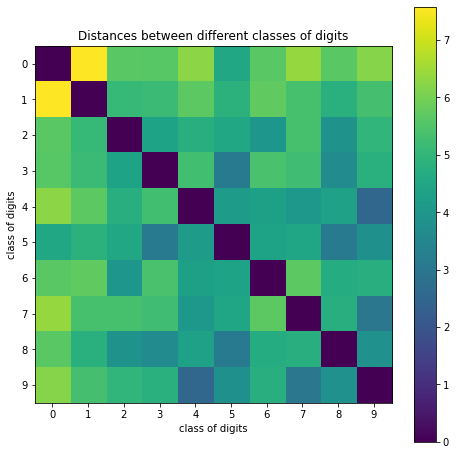

In [151]:
fig, ax = plt.subplots(figsize=(8,8))
grid = ax.imshow(MD, interpolation='nearest')
ax.set(title='Distances between different classes of digits', 
       xticks=range(10), 
       xlabel='class of digits', 
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show()